In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Обработка датасета

In [2]:
#Загрузим датасет и посмотрим, какие там есть переменные
df = pd.read_pickle('finaldataset.pkl')
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1000 non-null   object 
 1   Rate       984 non-null    float64
 2   Country    1000 non-null   object 
 3   View       1000 non-null   int64  
 4   Year       1000 non-null   int64  
 5   Duration   991 non-null    float64
 6   Director   1000 non-null   object 
 7   Genre      1000 non-null   object 
 8   Roles1     1000 non-null   object 
 9   Roles2     1000 non-null   object 
 10  OscarA     1000 non-null   int64  
 11  OscarD     1000 non-null   int64  
 12  Good mark  1000 non-null   int64  
 13  Region     1000 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 109.5+ KB


In [3]:
#Создадим новый датасет, убрав колонку с названием, так как она не имеет значения для обучения модели, а также страны,так
# как в датасете есть более обощенная колонка с регионами, и рейтинг, так как он напрямую влияет на то хорошая оценка или
# нет (Мы будем исходить из того, что рейтинг неизвестин и пока просто хотим понять, будет ли оценка хорошей)
#Уберем столбцы с режиссерами и актерами, так как при применении модели в дальнейшем, в фильмах, для которых будет 
# делаться прогноз, могут быть совершенно другие актеры и режиссеры и модель не будет работать
# еще уберем из датасета новые фильмы
df_ML=df.drop(['Name','Country','Roles1','Director','Roles2','Rate'],axis=1)
#Посмотрим на пропуски
df_ML.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   View       1000 non-null   int64  
 1   Year       1000 non-null   int64  
 2   Duration   991 non-null    float64
 3   Genre      1000 non-null   object 
 4   OscarA     1000 non-null   int64  
 5   OscarD     1000 non-null   int64  
 6   Good mark  1000 non-null   int64  
 7   Region     1000 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


count    991.000000
mean     116.691221
std       25.030477
min        0.000000
25%      100.000000
50%      114.000000
75%      130.000000
max      242.000000
Name: Duration, dtype: float64

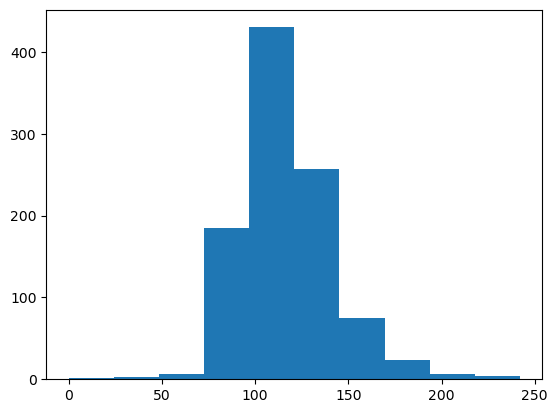

In [4]:
#Видим, что пропуски есть в продолжительности фильма, посмторим на его распредление
plt.hist(df_ML['Duration'])
#Видно, что значения по бокам выглядят выглядят намного меньше, чем значения в середине. Посмотрим на описательные 
#статистики
df_ML['Duration'].describe()
#Видим,что есть данные со значением 0, однако фильм не может длиться 0 минут




In [5]:
#Проверим наличия выбросов, считая выбросом то, что больше среднего на  3 и более стандартных отклонения и 
#посмотрим на среднее без выбросов
df_ML[(df_ML['Duration']>=df_ML['Duration'].mean()-3*df_ML['Duration'].std())&
      (df_ML['Duration']<=df_ML['Duration'].mean()+3*df_ML['Duration'].std())].describe()

 

,View,Year,Duration,OscarA,OscarD,Good mark
count,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000
mean,2.032046e+05,2010.273006,116.008180,0.189162,0.076687,0.700409
std,2.047877e+05,14.328365,22.349278,0.391837,0.266230,0.458313
min,0.000000e+00,1943.000000,45.000000,0.000000,0.000000,0.000000
25%,3.846825e+04,2005.250000,100.000000,0.000000,0.000000,0.000000
50%,1.507290e+05,2015.000000,113.000000,0.000000,0.000000,1.000000
75%,2.987555e+05,2021.000000,130.000000,0.000000,0.000000,1.000000
max,1.575000e+06,2023.000000,189.000000,1.000000,1.000000,1.000000


In [6]:
#Среднее стало чуть меньше, возьмем его и заменим им пропуски в продолжительности(также заменим значения в исходном 
# датасете,чтобы использовать его для проверки гипотез)
df_ML['Duration']=df_ML['Duration'].fillna(116.008180)
df['Duration']=df['Duration'].fillna(116.008180)
#Теперь уберем выбросы
df_ML=df_ML[(df_ML['Duration']>=df_ML['Duration'].mean()-3*df_ML['Duration'].std())&
      (df_ML['Duration']<=df_ML['Duration'].mean()+3*df_ML['Duration'].std())]
df=df[(df['Duration']>=df['Duration'].mean()-3*df['Duration'].std())&
      (df['Duration']<=df['Duration'].mean()+3*df['Duration'].std())]


In [7]:
#Теперь уберем выбросы из столбца с просмотрами
df_ML=df_ML[(df_ML['View']>=df_ML['View'].mean()-3*df_ML['View'].std())&
      (df_ML['View']<=df_ML['View'].mean()+3*df_ML['View'].std())]
df=df[(df['View']>=df['View'].mean()-3*df['View'].std())&
      (df['View']<=df['View'].mean()+3*df['View'].std())]
df_ML=df_ML.reset_index(drop=True)
df=df[(df['Rate']>=df['Rate'].mean()-3*df['Rate'].std())&
      (df['Rate']<=df['Rate'].mean()+3*df['Rate'].std())]
df=df.reset_index(drop=True)


In [8]:
df_ML

,View,Year,Duration,Genre,OscarA,OscarD,Good mark,Region
0,640337,1994,88.0,мультфильм,1,0,1,Америка
1,629477,2017,105.0,мультфильм,0,0,1,Америка
2,428717,1973,87.0,военный,0,0,1,СНГ(СССР)
3,363121,1972,175.0,драма,1,0,1,Америка
4,603239,1994,133.0,боевик,1,0,1,Европа
...,...,...,...,...,...,...,...,...
963,751,1945,63.0,документальный,0,0,1,СНГ(СССР)
964,1730,2005,103.0,драма,0,0,1,СНГ(СССР)
965,2190,1966,92.0,драма,0,0,1,СНГ(СССР)
966,689,1989,93.0,драма,0,0,1,СНГ(СССР)


# Гипотезы

In [9]:
#Выберем уровень значимости = 0.05
from statsmodels.stats.weightstats import ztest
a = 0.05
df.describe()

,Rate,View,Year,Duration,OscarA,OscarD,Good mark
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,7.273779,190569.562633,2010.199575,115.705945,0.188960,0.076433,0.707006
std,0.740969,172787.718377,14.395672,21.959279,0.391685,0.265831,0.455377
min,5.000000,0.000000,1943.000000,45.000000,0.000000,0.000000,0.000000
25%,6.800000,40235.750000,2006.000000,100.000000,0.000000,0.000000,0.000000
50%,7.300000,149379.000000,2015.000000,113.000000,0.000000,0.000000,1.000000
75%,7.800000,293322.000000,2021.000000,129.000000,0.000000,0.000000,1.000000
max,8.800000,810002.000000,2023.000000,189.000000,1.000000,1.000000,1.000000


In [10]:
#Проверим гипотезу о том, что вероятность оскароносного актера в фильмах с оценкой выше и равной 7 равно
#вероятности оскароносного актера в фильмах с оценкой ниже 7
#Альтернативная гипотеза:в первом случае вероятность выше
#Используем тест для разности долей, так как работаем с биномиальным распределением
p1 = df['OscarA'][df['Rate']>=7].mean()
p2 = df['OscarA'][df['Rate']<7].mean()
#Используем тест для разности долей
print('stat:',(p1-p2)/np.sqrt((p1*(1-p1)/len(df['OscarA'][df['Rate']>=7]))+(p2*(1-p2)/len(df['OscarA'][df['Rate']<7]))))
#p-value
from scipy.stats import binom_test
pv = binom_test( (df['OscarA'][df['Rate']>=7].sum(),df['OscarA'][df['Rate']<7].sum()),n=(len(df['OscarA'][df['Rate']>=7]),len(df['OscarA'][df['Rate']<7])), alternative='greater')
if pv>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')


stat: 3.552611789739069
Основная гипотеза отвергается


In [11]:
#Проверим гипотезу о том, что вероятность оскароносного режиссера в фильмах с оценкой выше и равной 7 равно
#вероятности оскароносного режиссера в фильмах с оценкой ниже 7
#Альтернативная гипотеза:в первом случае вероятность выше
#Используем тест для разности долей, так как работаем с биномиальным распределением
p1 = df['OscarD'][df['Rate']>=7].mean()
p2 = df['OscarD'][df['Rate']<7].mean()
#Используем тест для разности долей
print('stat:',(p1-p2)/np.sqrt((p1*(1-p1)/len(df['OscarD'][df['Rate']>=7]))+(p2*(1-p2)/len(df['OscarD'][df['Rate']<7]))))
#p-value
from scipy.stats import binom_test
pv1 = binom_test( (df['OscarD'][df['Rate']>=7].sum(),df['OscarD'][df['Rate']<7].sum()),n=(len(df['OscarD'][df['Rate']>=7]),len(df['OscarD'][df['Rate']<7])), alternative='greater')
if pv1>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')

stat: 6.905411275598332
Основная гипотеза отвергается


In [12]:
#Проверим гипотезу о том, что в фильмах с оценкой выше 7 или равной мат.ожидание просмотров равно мат.ожиданию просмотров
#в фильмах с оценкой ниже 7
#Альтернативная гипотеза:в первом случае мат.ожидание больше 
#Используем z-тест, так как значений достаточно, выборки независимые и нет выбросов
more7 = df['View'][df['Rate']>=7]
less7 = df['View'][df['Rate']<7]
pv2 = ztest(more7,less7,alternative='larger')[1]
if pv2>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')


Основная гипотеза отвергается


In [13]:
#Проверим гипотезу о том, что в фильмах с оценкой выше 7 или равной мат.ожидание продолжительности равно мат.ожиданию 
# продолжительности в фильмах с оценкой ниже 7
#Альтернативная гипотеза:в первом случае мат.ожидание больше
#Используем z-тест, так как значений достаточно, выборки независимые и нет выбросов
more71 = df['Duration'][df['Rate']>=7]
less71 = df['Duration'][df['Rate']<7]
pv3 = ztest(more71,less71,alternative='larger')[1]
if pv3>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')

Основная гипотеза отвергается


In [14]:
#Проверим гипотезу о том, что мат.ожидание рейтинга, в фильмах вышедших до 2000 года равно мат.ожиданию рейтинга фильмов, вышедших
#после 2000.
#Альтернативная гипотеза:в первом случае мат.ожидание больше
#Используем z-тест, так как значений достаточно, выборки независимые и нет выбросов
old = df['Rate'][df['Year']<2000]
new = df['Rate'][df['Year']>=2000]
pv4 = ztest(old,new,alternative='larger')[1]
if pv4>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')


Основная гипотеза отвергается


In [15]:
#Проверим гипотезу о том, что мат. ожидание рейтинга фильмов с жанром аниме выше чем мат. ожидание рейтинга фильмов 
# других жанров.
#Альтернативная гипотеза:в первом случае мат.ожидание больше
anime = df[df['Genre']=='аниме']['Rate']
other = df[df['Genre']!='аниме']['Rate']
#Используем U-тест(Манна Уитни), так как значений недостаточно, выборки независимые и нет выбросов
pv5 = stats.mannwhitneyu(anime,other, alternative='greater')[1]
if pv5>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')



Основная гипотеза отвергается


In [16]:
#Проверим гипотезу о том, что мат. ожидание рейтинга фильмов, снятых в Новой Зеландии выше чем мат. ожидание рейтинга 
# фильмов, снятых в других странах
#Альтернативная гипотеза:в первом случае мат.ожидание больше
NZ = df[df['Country']=='Новая Зеландия']['Rate']
Country = df[df['Country']!='Новая Зеландия']['Rate']
#Используем U-тест(Манна Уитни), так как значений недостаточно, выборки независимые и нет выбросов
pv6 = stats.mannwhitneyu(NZ,Country, alternative='greater')[1]
if pv6>a:
    print('Основная гипотеза не отвергается')
else:
    print('Основная гипотеза отвергается')

Основная гипотеза отвергается


## Выводы по гипотезам

Исходя из проверенных выше гипотез, получаем следующие выводы:

1)В фильмах с оценкой 7 и выше актеры и режиссеры с оскаром встречаются чаще, чем в других случаях.

2)У фильмов с оценкой 7 и выше просмотров больше, чем в среднем по фильмам с оценкой ниже.

3)Фильмы с оценкой 7 и выше идут дольше, чем в среднем фильмы с оценкой ниже.

4)Рейтинг в среднем выше у фильмов вышедших до 2000 года.

5)Аниме имеет в среднем рейтинг выше, чем другие жанры.

6)Фильмы, созданные в Новой Зеландии имеют в среднем более высокий рейтинг относительно других стран.

# Машинное обучение


In [17]:
#Разделим данные на тест и трейн
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_ML, test_size=0.2, stratify=df_ML['Good mark'], random_state=40)

In [18]:
#Выделим Good mark как целевое значение
y_train = df_train['Good mark']
y_test = df_test['Good mark'] 
X_train = df_train.drop('Good mark', axis=1)
X_test = df_test.drop('Good mark', axis=1)

In [19]:
#Выделим категориальные и числовые критерии, которые затем надо будет преобразовать
categorical_features = ['Genre','Region']
numeric_features = ['View','Year','Duration','OscarA','OscarD']

In [20]:
#Сделаем OHE, scaling и создадим для этого column transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)])

## Логистическая регрессия

In [21]:
#Для начала получим логистическую регрессию, обучим модель, подберем гиперпарметры
from sklearn.linear_model import LogisticRegression
model = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression())
])

### Подбор гиперпарметров для логистической регрессии

In [22]:
#Для начала найдем лучший solver, а затем по нему подберем остальные гиперпараметры
from sklearn.model_selection import GridSearchCV
parameters = {'regression__solver': ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}
searcher_lr = GridSearchCV(model, param_grid=parameters, scoring='roc_auc', cv=10, n_jobs=-1)
logreg_cv = searcher_lr.fit(X_train, y_train)
print('The best solver is',logreg_cv.best_params_['regression__solver'])
best_solver=logreg_cv.best_params_['regression__solver']

The best solver is newton-cg


In [23]:
#Так как solver - newton-cg, выберем penalty, которые подходят этому способу
#Подбираем остальные гиперпараметры
from sklearn.metrics import roc_auc_score

parameters1 = {'regression__penalty': ['none','l2'],'regression__C': np.logspace(-2, 4, 20)}
model1=Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression(solver='newton-cg'))])
searcher_lr1 = GridSearchCV(model1, parameters1, scoring='roc_auc', cv=10, n_jobs=-1)
logreg_cv1 = searcher_lr1.fit(X_train, y_train)
print('The best C is',logreg_cv1.best_params_['regression__C'])
print('The best penalty is', logreg_cv1.best_params_['regression__penalty'])
best_C=logreg_cv1.best_params_['regression__C']
best_penalty=logreg_cv1.best_params_['regression__penalty']


The best C is 1.623776739188721
The best penalty is l2


### Обучение модели и проверка ее качества

In [24]:
#Обучим итоговую модель, подставив подобранные гиперпараметры
model_lr=Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression(C=best_C,solver=best_solver,penalty=best_penalty))
])
model_lr.fit(X_train, y_train)

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  ['View', 'Year', 'Duration',
                                                   'OscarA', 'OscarD']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genre', 'Region'])])),
                ('regression',
                 LogisticRegression(C=1.623776739188721, solver='newton-cg'))])

In [25]:
#Посмотрим на метрики, начнем с наименее полезной -accuracy, сравним ее с долей наиболее часто встречающегося класса 
# и сделаем выводы.
from sklearn.metrics import accuracy_score
p_pred = model_lr.predict_proba(X_test)
y_pred = model_lr.predict(X_test)
print('Доля верно классифицированных отвветов:',accuracy_score(y_test, y_pred))
print('Доля наиболее часто встречающегося класса:',(df[df['Good mark']==1].shape[0])/(df['Good mark'].shape[0]))
#Полученная оценка accuracy показывает, что доля верно квалифицированных объектов больше, чем доля объектов 
#наиболее часто встречающегося класса, что говорит об относительно хорошем качестве модели.

Доля верно классифицированных отвветов: 0.8247422680412371
Доля наиболее часто встречающегося класса: 0.7070063694267515


Порог: 0.33199999999999974
Точность: 0.84
Полнота: 0.9473684210526315
F-beta: 0.8904593639575972


Text(0, 0.5, 'F-beta')

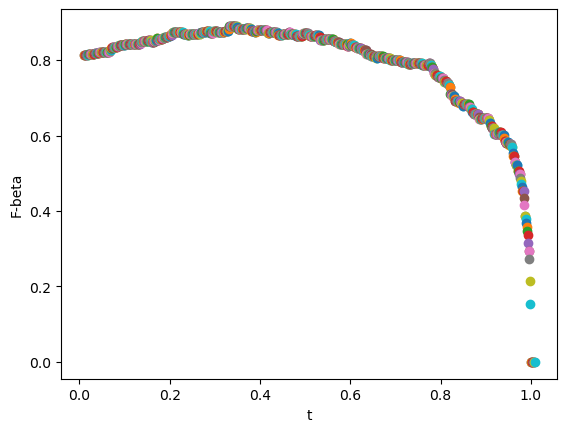

In [26]:
#Теперь посмотрим на точтость, полноту и Fbeta, будем считать, что точность и полнота нам одинаково важны
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score, recall_score
numbers=np.arange(0.01,1.01,0.001)
B=[]
steps=[]
for t in numbers:
    y_pred = 1*(p_pred[:,-1] >=t) 
    plt.scatter(t,fbeta_score(y_test, y_pred, beta=1))
    B.append(fbeta_score(y_test, y_pred, beta=1))
    steps.append(t)
n=steps[B.index(max(B))]
y_pred = 1*(p_pred[:,-1] >=n)
print('Порог:', n)
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))
print('F-beta:',fbeta_score(y_test, y_pred, beta=1))
plt.xlabel('t')
plt.ylabel('F-beta')
#Все показатели получились достаточно высокими, что говорит об относительно хорошем качесиве модели

In [27]:
#Теперь нарисуем ROC-AUC и посмотрим на ROC-AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_auc_pic(Y_test, p_pred):    
    fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, p_pred)
    roc_auc_test = roc_auc_score(Y_test, p_pred)
    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test, tpr_test, label='Test ROC-AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');

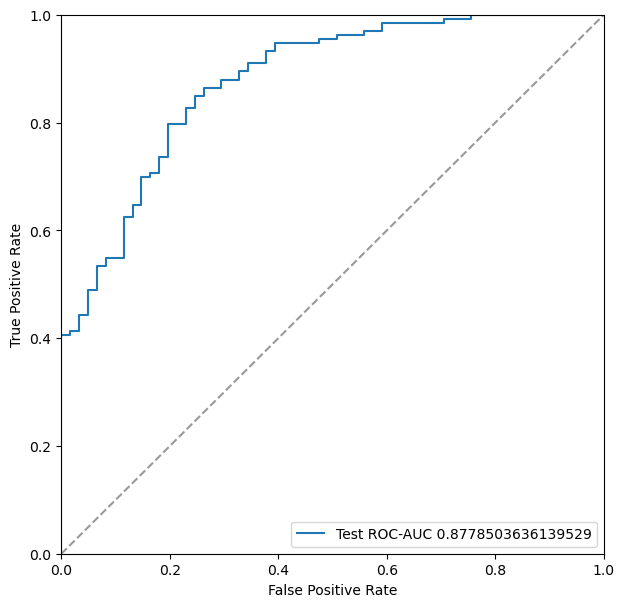

In [28]:
roc_auc_pic(y_test, p_pred[:,-1])

In [29]:
roc_auc_score(y_test, p_pred[:,-1])
#Качество модели получилось достаточно высоким

0.8778503636139529

### Интерпретация модели

In [30]:
#Посмотрим на коэффициенты и на то, как они влияют на то, будет ли оценка у фильма хорошей
model_lr.steps[1][1].coef_
#Так как мы не можем посмотреть, к каким столбцам относится коэффициенты из-за OHE, попробуем сделать это вручную



array([[ 1.21261678, -1.92973916,  0.44879203,  0.1126111 ,  0.37667337,
         0.71311662, -1.1921443 ,  0.10091394,  0.64280272, -0.08073848,
         0.13899848,  0.22451831, -0.26640358, -0.3907866 ,  0.46136709,
        -0.1926235 ,  1.04066587,  0.19634678, -1.36967509,  0.7692071 ,
        -0.54804059, -1.30160326, -1.71797436, -1.51167935,  0.67696823,
        -0.80148859,  0.16042281, -0.4647869 ]])

In [31]:
#Посмотрим на порядок столбцов в исходном датасете
df_ML.drop('Good mark',axis=1).columns


Index(['View', 'Year', 'Duration', 'Genre', 'OscarA', 'OscarD', 'Region'], dtype='object')

In [32]:
#Посмотрим уникальные значения жанров, жанр спорт встречается всего один раз, поэтому вероятнее всего его нет в модели
df_ML['Genre'].unique()

array(['мультфильм', 'военный', 'драма', 'боевик', 'криминал',
       'фантастика', 'фэнтези', 'история', 'триллер', 'вестерн', 'аниме',
       'мелодрама', 'биография', 'детектив', 'спорт', 'документальный',
       'ужасы', 'мюзикл', 'комедия', 'приключения', 'семейный'],
      dtype=object)

In [34]:
#Посмотрим уникальные значения регионов
df_ML['Region'].unique()

array(['Америка', 'СНГ(СССР)', 'Европа', 'Австралия и океания', 'Азия'],
      dtype=object)

Просмотры: Чем больше просмотров, тем больше вероятность хорошей оценки 

Год: Чем фильм старее, тем больше вероятность хорошей оценки

Длительность: Чем фильм длиннее, тем больше вероятность хорошей оценки

Наличие актеров с оскаром: Наличие оскороносного актера увеличивает вероятность хорошей оценки

Наличие режиссеров с оскаром: Наличие оскороносного режиссера увеличивает вероятность хорошей оценки

Жанр: Вероятность хорошей оценки выше, если у фильма один из этих жанров (по убыванию вероятности): биография, ужасы, военный, криминал, аниме, история, детектив, фэнтези, боевик.

Ниже всего вероятность хорошей оценки при жанре "приключения" ,"семеный", "документальный","комедия","драма".

Регион: Вероятность хорошей оценки повышаетс, если фильм снят в СНГ или Австралии, и понижается, если в в Европе или Азии



## Метод ближайших соседей

In [35]:
#Попробуем использовать метод ближайших соседей и посмотрим, какой способ дает качество лучше
#Для начала подберем оптимальное количество соседей
#Затем обучим модель
from sklearn.neighbors import KNeighborsClassifier
model_knn = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('knn', KNeighborsClassifier())
])

k = np.linspace(5, 205, 21, dtype=int)

searcher_knn = GridSearchCV(model_knn, [{"knn__n_neighbors": k}],
                        scoring="roc_auc", cv=5, n_jobs=-1)
searcher_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe_and_scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['View',
                                                                          'Year',
                                                                          'Duration',
                                                                          'OscarA',
                                                                          'OscarD']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                 

0.8864784913102428

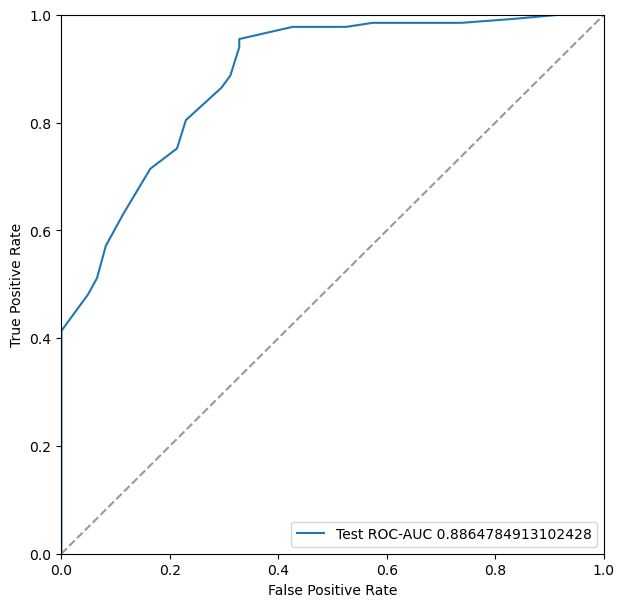

In [36]:
#Посмторим на ROC-AUC и сравним со значением логистической регрессии
y_pred = searcher_knn.predict(X_test)
accuracy_score(y_test, y_pred)
p_pred = searcher_knn.predict_proba(X_test)
roc_auc_pic(y_test, p_pred[:,-1])
roc_auc_score(y_test, p_pred[:,-1])
#Качество оказалось лучше, чем в случае логистической регрессии

## Случайный лес

In [37]:
#Попробуем использовать базовый вариант случайного леса
from sklearn.experimental import enable_halving_search_cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import HalvingGridSearchCV
model_rf=Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=1000))
])
#Обучим модель и посмотрим на качество, сравним с KNN и логистической регрессией

model_rf.fit(X_train, y_train)
p_pred = model_rf.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])
#Качество получилось хуже, чем в случае логистической регрессии и KNN


0.8623813632441759

## Итог


Обучив несколько различных и сравнив их метрики качества, мы пришли к выводу, что метод ближайших соседей дает наилучший результат по качеству, поэтому самым оптимальным будет выбрать его для предсказания будет ли у фильма хорошая оценка.